# Project: Wrangling and Analyze Data

Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. 

Loading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv) into the "df_tae" dataframe

In [2]:
df_tae = pd.read_csv('twitter_archive_enhanced.csv')

Assign the url and use the 'requests.get' function

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

Response [200] shows that it was downloaded successfully

 Writing to the filehandle that was opened, using "file.write(response.text)"

In [4]:
with open('image_predictions.tsv', 'w') as f:
    f.write(response.text)

In [5]:
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'ycac4168y0ugV3GZ8noSr8s1s'
consumer_secret = 'EUOCMgABhwEcPFPLPj1AzhEXjAHsuCjCeHXKPzTFiepFh7rGFd'
access_token = '1553421997803184129-c671wdLH0dWurvrLn0q3Ja5vUT2xOK'
access_secret = 'NeIUPI0KeIHP0MKQai8anOryK79h1FSw75mVSxCOMI2wr'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tae.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [7]:
import pandas as pd
import json
with open ('tweet_json.txt', encoding = "utf-8") as f:
    df_tweets = pd.DataFrame(pd.json_normalize([json.loads(line) for line in f.readlines()]), columns = ['id', 'favorite_count', 'retweet_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing the three datasets visually by printing ten random samples of each dataset.

In [8]:
df_tae.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1688,681523177663676416,NaN,NaN,2015-12-28 17:12:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carly. She's actually 2 dogs fused tog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681523177...,12,10,Carly,None,None,None,None
1478,693590843962331137,NaN,NaN,2016-01-31 00:25:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Phil. He's big af. Currently destroying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693590843...,3,10,Phil,None,None,pupper,None
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670303360...,9,10,a,None,None,None,None
1407,699079609774645248,NaN,NaN,2016-02-15 03:55:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Reagan. He's a Persnicketus Derpson. Grea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699079609...,8,10,Reagan,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
1060,741438259667034112,NaN,NaN,2016-06-11 01:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's still figuring out couche...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741438259...,9,10,Tucker,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,811740824.0,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
2131,670086499208155136,NaN,NaN,2015-11-27 03:47:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hi yes this is dog. I can't help with that s-...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/670086499...,10,10,None,None,None,None,None
935,753398408988139520,NaN,NaN,2016-07-14 01:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. Her batteries are low. 12/10 pr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/753398408...,12,10,Scout,None,None,None,None


Discovered invalid names in the 'name' column of the df_tae dataset like 'None' and 'a'

In [9]:
dog_names = df_tae['name']
dog_names

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

In [10]:
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
#checking for duplicates
df_tae.duplicated().sum()

0

In [12]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1063,715342466308784130,https://pbs.twimg.com/media/Ce1oLNqWAAE34w7.jpg,1,West_Highland_white_terrier,0.597111,True,soft-coated_wheaten_terrier,0.142993,True,Lakeland_terrier,0.136712,True
893,699423671849451520,https://pbs.twimg.com/media/CbTaHrRW0AABXmG.jpg,1,pug,0.997860,True,French_bulldog,0.001825,True,bull_mastiff,0.000299,True
2015,879492040517615616,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1,German_short-haired_pointer,0.479896,True,vizsla,0.124353,True,bath_towel,0.073320,False
296,671362598324076544,https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg,1,tub,0.393616,False,bathtub,0.383522,False,swimming_trunks,0.077301,False
1334,757741869644341248,https://pbs.twimg.com/media/CoQKNY7XYAE_cuX.jpg,1,skunk,0.609715,False,Old_English_sheepdog,0.128899,True,Siberian_husky,0.019076,True
1398,768473857036525572,https://pbs.twimg.com/media/Cqoq5PGWAAA-U8T.jpg,1,Labrador_retriever,0.739170,True,Chesapeake_Bay_retriever,0.246488,True,kelpie,0.006892,True
1388,766313316352462849,https://pbs.twimg.com/media/CqJ95SRWgAATPK_.jpg,1,toy_poodle,0.966896,True,miniature_poodle,0.016424,True,cocker_spaniel,0.010227,True
433,674318007229923329,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,porcupine,0.846628,False,hamster,0.038136,False,echidna,0.014680,False
1559,793256262322548741,https://pbs.twimg.com/media/CwI2XCvXEAEO8mc.jpg,1,basset,0.207622,True,Walker_hound,0.060574,True,beagle,0.041221,True
1229,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,barrow,0.999962,False,basset,0.000014,True,wok,0.000006,False


In [13]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#checking for duplicates
df_image.duplicated().sum()

0

In [15]:
df_tweets.sample(10)

,id,favorite_count,retweet_count
701,780858289093574656,6770,1853
2181,667902449697558528,754,332
901,752519690950500352,6815,3140
782,770093767776997377,0,2797
2214,667443425659232256,681,485
1106,725458796924002305,1298,553
716,778774459159379968,0,9101
2083,669926384437997569,337,81
336,830583320585068544,62155,15345
137,863553081350529029,13613,3610


In [16]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2293 non-null   int64
 1   favorite_count  2293 non-null   int64
 2   retweet_count   2293 non-null   int64
dtypes: int64(3)
memory usage: 53.9 KB


In [17]:
df_tweets.duplicated().sum()

0

No duplicates was found in any of the datasets.

### Quality issues
1.  Rating numerator and rating denominator column's datatype should be float, not integer.

2. Drop the 'in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id' columns as they will not be needed.

3. Incorrect datatype of 'timestamp' column in df_tae.

4. ID fields: The ID fields, like tweet_id should be objects, not integers or floats because they are not in numeric form and are not intended to perform calculations.

5. Invalid names in the df_tae dataset.

6. Use of short non-descriptive names in the df_image dataset.

7. Presence of 281 extra tweet_ids in the df_tae dataset compared to the image prediction dataset.

8. Drop the 'source' and 'expanded_url' columns in the df_tae dataset.

### Tidiness issues
1. Merge the 'doggo , floofer ,pupper ,puppo' columns into one column.

2. Combining the three dataframes: Difference in column header names containing same data ('twitter_id' and 'id'), which will be an issue in merging the data sets.

## Cleaning the datasets

**First, we will make a copy for each of the three dataset.**

In [18]:
df_tae_clean = df_tae.copy()
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

**Define** 
- Convert the rating numerator and rating denominator datatypes from 'int' to 'float' using DataFrame.astype() function.

**Code**

In [19]:
df_tae_clean['rating_numerator'] = df_tae_clean['rating_numerator'].astype(float)
df_tae_clean['rating_denominator'] = df_tae_clean['rating_denominator'].astype(float)

**Test**

In [20]:
df_tae_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator              float64
rating_denominator            float64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

**Define** 
- Drop the rows with retweets

**Code**

In [21]:
df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_id.isnull()]
df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_user_id.isnull()]
df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_timestamp.isnull()]

**Test**

In [22]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   float64
 11  rating_denominator          2175 non-null   float64
 12  name                        2175 non-null   object 
 13  doggo                       2175 

**Define** 
- columns not needed will be dropped

**Code**

In [23]:
drop_col = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

df_tae_clean.drop(drop_col, axis=1, inplace=True)

**Test**

In [24]:
df_tae_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

**Define** 
- Converting the datatype of 'timestamp' from str to datetime.

**Code**

In [25]:
df_tae_clean['timestamp'] = pd.to_datetime(df_tae_clean.timestamp)

**Test**

In [26]:
df_tae_clean.dtypes['timestamp']

datetime64[ns, UTC]

**Define** 
- Renaming the 'id' column in df_tweets to match with the 'tweet_id' in the other datasets to aid in final merging.

**Code**

In [27]:
df_tweets_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

**Test**

In [28]:
df_tweets_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

**Define** 
- Converting the tweet_id datatype in in the three datasets to a string instead of integer.

**Code**

In [29]:
df_tae_clean.tweet_id = df_tae_clean.tweet_id.astype(str)
df_image_clean.tweet_id = df_image_clean.tweet_id.astype(str)
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype(str)

**Test**

In [30]:
df_tae_clean.dtypes['tweet_id']

dtype('O')

In [31]:
df_image_clean.dtypes['tweet_id']

dtype('O')

In [32]:
df_tweets_clean.dtypes['tweet_id']

dtype('O')

**Define** 
- Renaming column headers to be a bit descriptive.

**Code**

In [33]:
df_image_clean = df_image_clean.rename(columns={'p1':'prediction1', 'p1_conf':'prediction1_confidence', 'p1_dog':'prediction1_dog',
                                                'p2':'prediction2', 'p2_conf':'prediction2_confidence', 'p2_dog':'prediction2_dog',
                                                'p3':'prediction3', 'p3_conf':'prediction3_confidence', 'p3_dog':'prediction3_dog'})

**Test**

In [34]:
df_image_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction1',
       'prediction1_confidence', 'prediction1_dog', 'prediction2',
       'prediction2_confidence', 'prediction2_dog', 'prediction3',
       'prediction3_confidence', 'prediction3_dog'],
      dtype='object')

**Define** 
- Drop unneccessary columns in the df_tae dataset.

**Code**

In [35]:
drop_cols = ['source', 'expanded_urls']

df_tae_clean.drop(drop_cols, axis=1, inplace=True)

**Test**

In [36]:
df_tae_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**Define** 
- Clean out the invalid names in the df_tae_clean dataset

**Code**

In [37]:
# identify all names that are not capitalized which have been assessed to be invalid or mistyped.
names_small = df_tae_clean.name.str.contains('^[a-z]', regex = True)
df_tae_clean[names_small].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [38]:
# Renaming all the invalid names to 'NaN'.
df_tae_clean.loc[names_small, 'name'] = "NaN"

**Test**

In [39]:
df_tae_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'NaN', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 

**Define** 
- Drop extra rows in the df_tae_clean dataset to equate the row number with df_image_clean.

**Code**

In [40]:
df_tae_clean = df_tae_clean.drop(df_tae_clean.index[2076:])

**Test**

In [41]:
df_tae_clean.shape

(2076, 10)

**Define** 
- Copying the 'doggo , floofer ,pupper ,puppo' columns into one column (dog_stage) and dropping their original columns.

**Code**

In [98]:
# handle none
df_tae_clean.doggo.replace('None', '', inplace=True)
df_tae_clean.floofer.replace('None', '', inplace=True)
df_tae_clean.pupper.replace('None', '', inplace=True)
df_tae_clean.puppo.replace('None', '', inplace=True)

# merge into column - (dog_stage)
df_tae_clean['dog_stage'] = df_tae_clean.doggo + df_tae_clean.floofer + df_tae_clean.pupper + df_tae_clean.puppo

# handle multiple stages
df_tae_clean.loc[df_tae_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
df_tae_clean.loc[df_tae_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
df_tae_clean.loc[df_tae_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
df_tae_clean.loc[df_tae_clean.dog_stage == '', 'dog_stage'] = np.nan

In [99]:
# dropping unneded doggo, floofer, pupper or poppo columns
df_tae_clean = df_tae_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

**Test**

In [44]:
df_tae_clean.head(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10.0,None,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13.0,10.0,None,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo


#### DEFINE 
- Merging the three datasets into one master dataset

**Code**

In [45]:
#Using the pd.merge pandas function to merge the three datasets
master_dataset = pd.merge(df_tae_clean , df_tweets_clean , left_on='tweet_id', right_on='tweet_id', how='inner')
master_dataset = pd.merge(master_dataset , df_image_clean , left_on='tweet_id', right_on='tweet_id', how='inner')

**Test**

In [46]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1862 entries, 0 to 1861
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1862 non-null   object             
 1   timestamp               1862 non-null   datetime64[ns, UTC]
 2   text                    1862 non-null   object             
 3   rating_numerator        1862 non-null   float64            
 4   rating_denominator      1862 non-null   float64            
 5   name                    1862 non-null   object             
 6   dog_stage               299 non-null    object             
 7   favorite_count          1862 non-null   int64              
 8   retweet_count           1862 non-null   int64              
 9   jpg_url                 1862 non-null   object             
 10  img_num                 1862 non-null   int64              
 11  prediction1             1862 non-null   obj

In [47]:
master_dataset.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,33643,6961,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,29185,5267,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,21956,3463,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,36750,7184,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,35144,7707,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing the data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
#CODE
master_dataset.to_csv('twitter_archive_master.csv', index=False)

In [49]:
#TEST
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,33643,6961,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,29185,5267,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,21956,3463,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,36750,7184,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,35144,7707,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Analyzing and Visualizing Data

In [70]:
df_master.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

*Analyze, visualize your wrangled data and produce three (3) insights and one (1) visualization.*

In [50]:
df_master.favorite_count.describe()

count      1862.000000
mean       7944.427497
std       11259.425985
min         180.000000
25%        1881.500000
50%        3636.500000
75%        9900.250000
max      144054.000000
Name: favorite_count, dtype: float64

The favorite count also has a high number with the max. being #144054 and min. being #180, which means many people tend to love their content.

In [64]:
# the least favorite picture 
df_master.query('favorite_count == 180')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
1818,668620235289837568,2015-11-23 02:41:01+00:00,Say hello to Kallie. There was a tornado in th...,10.0,10.0,Kallie,NaN,180,35,https://pbs.twimg.com/media/CUdqjvAWUAANfoU.jpg,1,crash_helmet,0.757942,False,toaster,0.037497,False,mouse,0.027271,False


In [65]:
# the least favorite picture 
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/media/CUdqjvAWUAANfoU.jpg') 

I see why this was their least favourite picture :)

In [66]:
# the most favorite picture 
df_master.query('favorite_count == 144054')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
752,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,13.0,10.0,None,doggo,144054,70221,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [54]:
# the most favorite picture 
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg') 

Obviously a heart-endearing pic if you ask me.

In [55]:
df_master.retweet_count.describe()

count     1862.000000
mean      2291.267991
std       3915.821465
min         28.000000
25%        550.250000
50%       1129.000000
75%       2614.750000
max      70221.000000
Name: retweet_count, dtype: float64

The maximum retweets for a post is #70221.
The minimum retweets for a post is #28.
Since the min number of retweets is #28, and they have been able to achieve upto #70221 retweets. This shows that 'The WeRateDogs Twitter account has built some level of fame over their existence.

In [67]:
# the most retweeted picture 
df_master.query('retweet_count == 70221')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
752,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,13.0,10.0,None,doggo,144054,70221,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [57]:
# the picture with most retweets
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg') 

In conclusion, this is the best and most loved picture that was posted by the WeRateDogs twitter account.

In [68]:
# the least retweeted picture 
df_master.query('retweet_count == 28')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog
1831,668291999406125056,2015-11-22 04:56:43+00:00,I can't do better than he did. 10/10 https://t...,10.0,10.0,None,NaN,213,28,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,web_site,0.995535,False,skunk,0.001363,False,badger,0.000686,False


In [69]:
# the picture with the least retweets
Image(url = 'https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg') 

In conclusion, this is the least loved picture that was posted by the WeRateDogs twitter account.

#### Visualizing the relationship between the dog stage column and the favourite_count.

In [60]:
df_master.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False)

dog_stage
doggo, puppo      41787.000000
puppo             19482.363636
doggo             17820.135593
doggo, floofer    14787.000000
doggo, pupper     11979.888889
floofer           11163.714286
pupper             6183.345000
Name: favorite_count, dtype: float64

In [78]:
df_master.dog_stage.value_counts()

pupper            200
doggo              59
puppo              22
doggo, pupper       9
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

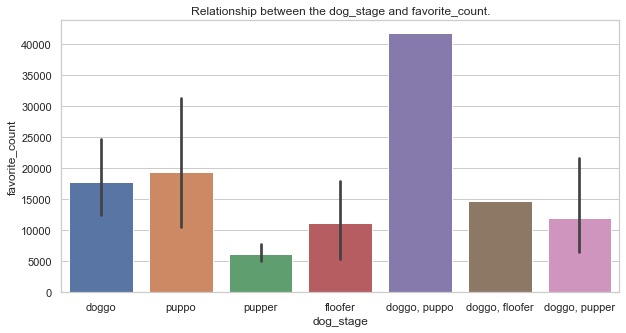

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style of background of plot
sns.set(style="whitegrid")
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 5))
# create a barplot using seaborn
chart = sns.barplot(x='dog_stage', y='favorite_count', data=df_master, ax=ax)
plt.title('Relationship between the dog_stage and favorite_count.')
plt.show()

The 'puppo' dogs have the highest number of favorite counts while the 'pupper' dogs have the lowest.
The 'doggo, puppo' and 'doggo, floofer' each have only one values that seem to be outliers and may need to be dropped.

#### Visualizing the relationship between the dog stage column and the retweet_count.

In [62]:
df_master.groupby('dog_stage')['retweet_count'].mean().sort_values(ascending=False)

dog_stage
doggo, puppo      16068.000000
doggo              6095.949153
puppo              5296.045455
floofer            3954.857143
doggo, pupper      3435.000000
doggo, floofer     2782.000000
pupper             1895.415000
Name: retweet_count, dtype: float64

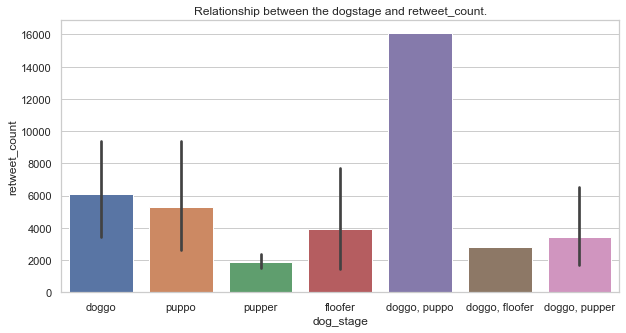

In [77]:
# use to set style of background of plot
sns.set(style="whitegrid")
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10, 5))
# creates a barplot using seaborn
chart = sns.barplot(x='dog_stage', y='retweet_count', data=df_master, ax=ax)
plt.title('Relationship between the dogstage and retweet_count.')
plt.show()

The 'doggo' dogs have the highest number of favorite counts while the 'pupper' dogs have the lowest. 
The 'doggo, puppo' and 'doggo, floofer' each have only one values that seem to be outliers and may need to be dropped.